## Setup

The version of CHAMP used in the article was customized to correct an error in the published version that incorrectly plotted data beyond the gamma range specified in the input. It also removed the limit in the published version that disregarded communities with fewer than 5 nodes. This version has no limit to the size of communities so that singleton communities can be identified and rejected. The label in the modularity plots was altered to display ">0 nodes" to make this apparent. 

The two custom plot functions for the heatmap and convex hull are as follows:

### champ.plot_single_layer_modularity_domains_custom(partition-ensemble, labels=True)
### champ.plot_similarity_heatmap_single_layer_custom(partition-ensemble, title=True)

**NOTES:** For these functions, the only required input is the name of the partition-ensemble. No need to specify "ind2doms", "partitions", etc.

Also note that installing MikTex was necessary. It returned errors without this. No need to edit path environment since it did it with installation.

The cells below show how to check which version of CHAMP is installed, uninstall it if necessary, and then reinstall the customized version used in the article from Github. 


In [ ]:
# install customized version directly from Github
!pip install git+https://github.com/mnotarian/CHAMP/

In [ ]:
# get a list of what's installed and where its source is
# make sure that CHAMP displays "champ @ git+https://github.com/mnotarian/CHAMP/...""
!pip freeze


In [ ]:
# uninstall if wrong version and install again above
!pip uninstall -y champ

# 30 Second Network Runs

In [60]:
#Import the necessary libraries and the network data for the 30 second network
#Saved from Gephi as Graphml.
import igraph as ig
import leidenalg as la
import pandas as pd
from igraph import *
thirty_second_net = Graph.Read_GraphML('thirty_second_network.graphml')

In [279]:
#get a summary of the igraph graph to make sure it's correct
summary(thirty_second_net)

IGRAPH U-W- 1249 50240 -- 
+ attr: b (v), closest fountain (v), cpm65 (v), cpm65_mostfrequent (v), fountain count (v), function_e (v), g (v), id (v), label (v), latitude (v), longitude (v), mod15 (v), mod15_q635601 (v), r (v), size (v), sort (v), total fountains (v), x (v), y (v), Edge Label (e), MMNT-EdgeType (e), id (e), weight (e)


In [278]:
#confirm that the graph is weighted
thirty_second_net.is_weighted()

True

In [86]:
# How to Coordinate original node IDs in Gephi with Vertex IDs created in CHAMP
# This will save the igraph attributes including its vertex ID and Gephi ID to a csv 
df = thirty_second_net.get_vertex_dataframe()
pd.DataFrame(df).to_csv('thirty_second_net_igraphnodesID.csv')

# 30 Second Network - First Set: 1000 runs

C:\ProgramData\Anaconda3\lib\site-packages\champ\leiden_ext.py:167: UserWarning: Parallel Leiden Modularity function is not available of windows system.  Running in serial
  warnings.warn("Parallel Leiden Modularity function is not available of windows system.  Running in serial",


803 of 1000 partitions are unique
44 of 1000 partitions after application of CHAMP
Number of twin sets:
[array([136, 141], dtype=int64)]


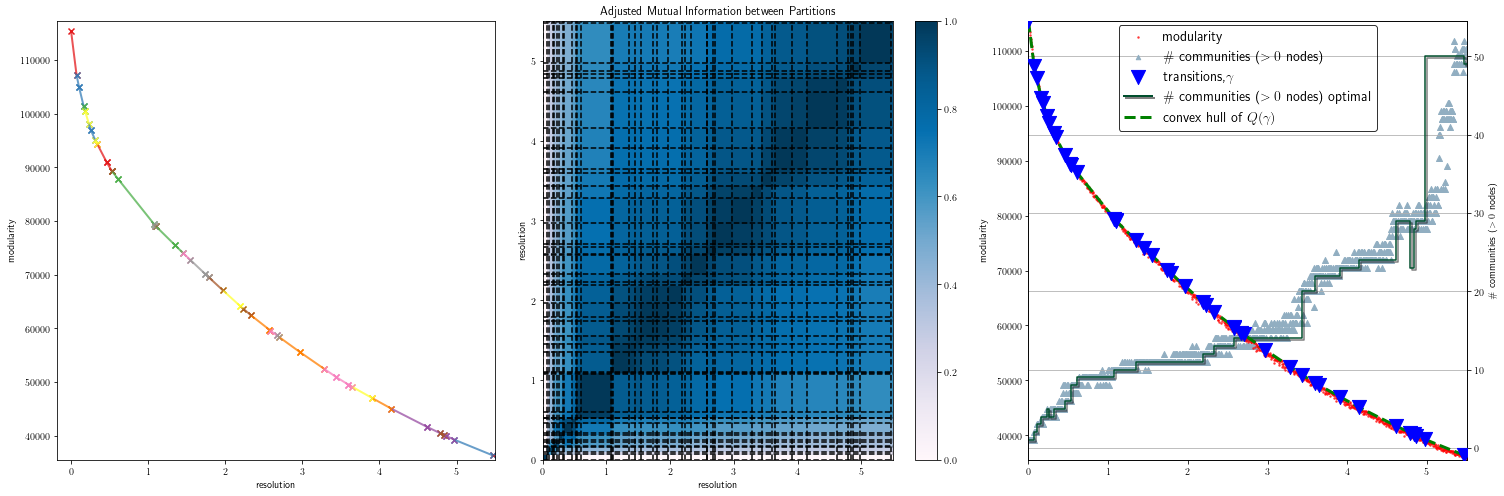

In [7]:
#run CHAMP on 30 second weighted network with no limit to small communities. Gammas 1-5.5
thirty_leiden1=champ.parallel_leiden(thirty_second_net,weight=True,
                                  numruns=1000,start=0,fin=5.5,
                                  numprocesses=2,
                                  progress=True)

print ("%d of %d partitions are unique"%(len(thirty_leiden1.unique_partition_indices),thirty_leiden1.num_parts))
print ("%d of %d partitions after application of CHAMP"%(len(thirty_leiden1.ind2doms),thirty_leiden1.num_parts))
print ("Number of twin sets:")
print (thirty_leiden1.twin_partitions)
#plot both of these
plt.close()
f,a=plt.subplots(1,3,figsize=(21,7))
a1,a2,a3=a
champ.plot_single_layer_modularity_domains_custom(thirty_leiden1,ax=a1,labels=True)
champ.plot_similarity_heatmap_single_layer_custom(thirty_leiden1,ax=a2,title=True)

#PartitionEnsemble has method to plot downsampled summary of all partitions
#with optmal transitions and number of communities overlayed.

thirty_leiden1.plot_modularity_mapping(ax=a3,no_tex=False)
plt.tight_layout()
plt.show()

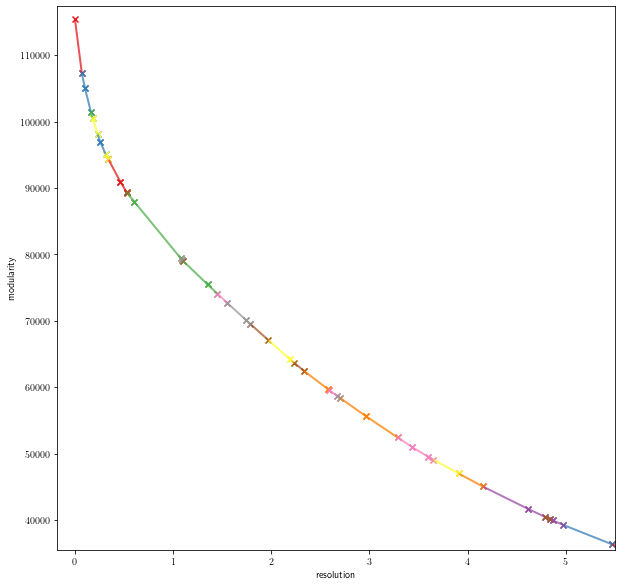

In [26]:
#save larger version of domain plot
from matplotlib import pyplot as plt
champ.plot_single_layer_modularity_domains_custom(thirty_leiden1,labels=True)
plt.savefig('thirty_gammas1-5.5 domains.svg')

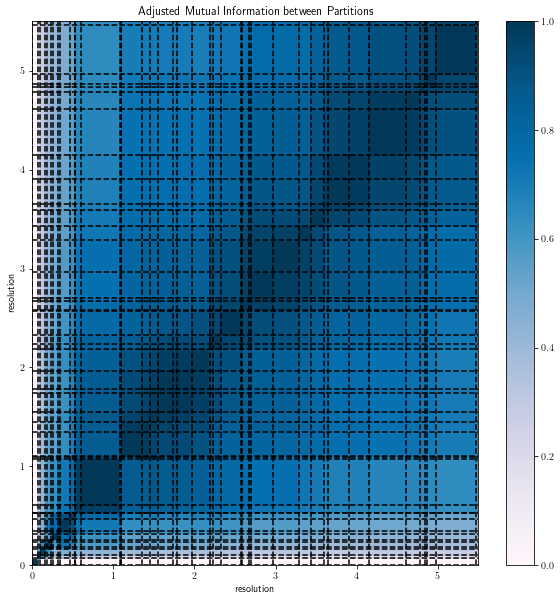

In [23]:
#save larger version of heatmap
from matplotlib import pyplot as plt
champ.plot_similarity_heatmap_single_layer_custom(thirty_leiden1,title=True)
#plt.figure(figsize=(10, 10))
plt.savefig('thirty_gammas1-5.5 heatmap.svg')

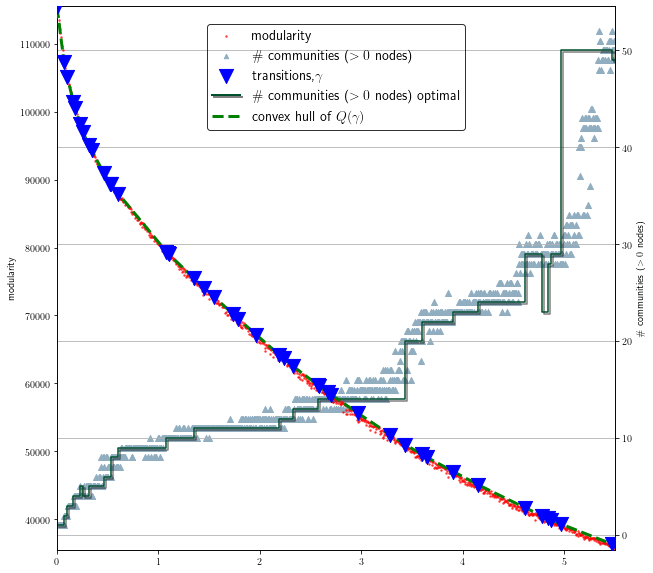

In [22]:
#save larger version of convex hull plot
from matplotlib import pyplot as plt
thirty_leiden1.plot_modularity_mapping(no_tex=False)
#plt.figure(figsize=(10, 10))
plt.savefig('thirty_gammas1-5.5.svg')

In [276]:
#This will create a dataframe that displays the partition index, number of communities, the gamma at which the partition 
#was detected (from 'resolutions') and the gamma transition for the dominant partition (from ind2doms)
#the difference between the gamma transition values indicates the width of the partition domain

pd.set_option('display.max_rows', None)
res_list = []
coms = []

for y in thirty_leiden1.ind2doms:
    res_list.append(thirty_leiden1.resolutions[y])
    coms.append(thirty_leiden1.numcoms[y])
    
res_list = zip(coms, res_list)

inds=list(zip(thirty_leiden1.ind2doms.keys(),[val[0][0] for val in thirty_leiden1.ind2doms.values()]))
#asscending sort by last value of domain
#inds.sort(key=lambda x: x[1])
inds = [ind[0] for ind in inds]
inds = sorted(inds)

def getKey(item):
    return item[1]

res_list = sorted(res_list, key=getKey)
#res_list = sorted(res_list)
#print(inds)
x = [thirty_leiden1.ind2doms[ind][0][0] for ind in inds]
x = sorted(x)

#print(res_list)

gamma_parts = pd.DataFrame(inds,columns=['partition #'])
#print(inds,x)
df=pd.DataFrame()
df['coms'] = res_list
df=pd.DataFrame(df['coms'].tolist(), columns=['communities', 'gamma detected'])
extracted_col = df["communities"]
gamma_parts = gamma_parts.join(extracted_col)
extracted_col2 = df["gamma detected"]
gamma_parts = gamma_parts.join(extracted_col2)
gamma_parts['gamma transition'] = x 
display(gamma_parts)

,partition #,communities,gamma detected,gamma transition
0,0,1.0,0.000000,0.000000
1,13,2.0,0.071572,0.070368
2,19,3.0,0.104605,0.101442
3,30,4.0,0.165165,0.162168
4,36,4.0,0.198198,0.180211
5,42,5.0,0.231231,0.230034
6,45,4.0,0.247748,0.256346
7,60,5.0,0.330330,0.314684
8,76,5.0,0.418418,0.341501
9,86,6.0,0.473473,0.461957


In [107]:
# This saves ALL the partitions in a CSV. Need to reference the dominant partition indices above to pull out ones of interest.
pd.DataFrame(thirty_leiden1.partitions).to_csv('30 second Leiden 1000 runs gamma1-5.5 leiden1.csv')

# 30 Second Network - Second Set: 5000 runs

The widest admissable partition in both runs was the same 9 community partition

C:\ProgramData\Anaconda3\lib\site-packages\champ\leiden_ext.py:167: UserWarning: Parallel Leiden Modularity function is not available of windows system.  Running in serial
  warnings.warn("Parallel Leiden Modularity function is not available of windows system.  Running in serial",


2417 of 5000 partitions are unique
58 of 5000 partitions after application of CHAMP
Number of twin sets:
[array([3081, 3086], dtype=int64), array([3089, 3088], dtype=int64), array([3066, 3076], dtype=int64), array([3060, 3062], dtype=int64)]


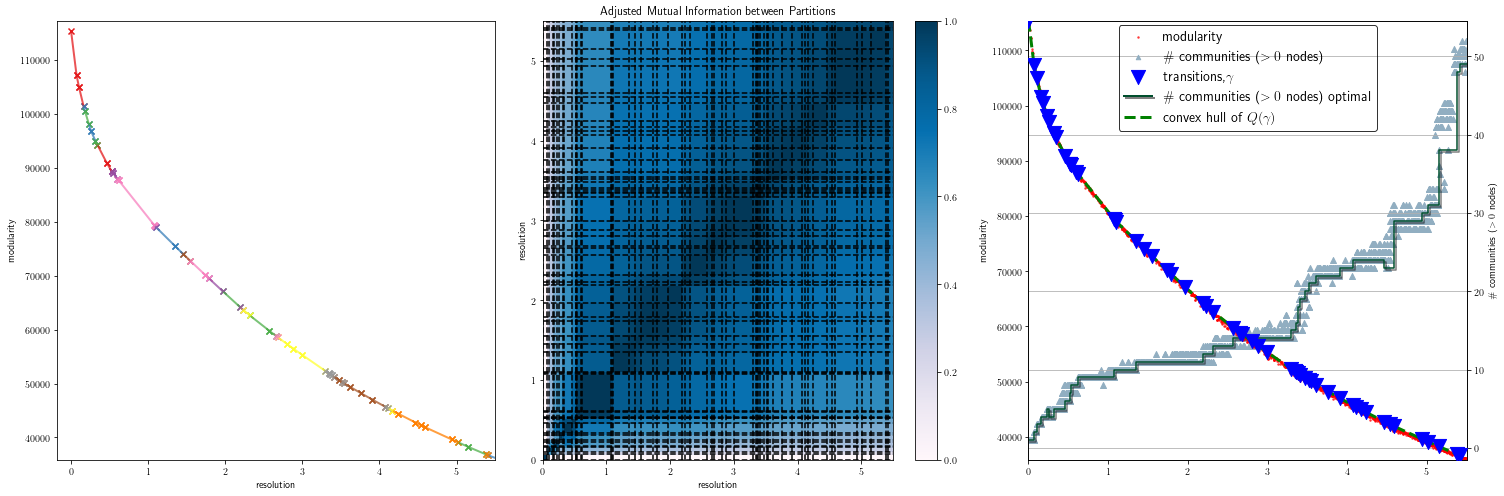

In [36]:
#run CHAMP on 30 second weighted network with no limit to small communities. Gammas 1-5.5. 5000 runs, 25 iterations
thirty_leiden2=champ.parallel_leiden(thirty_second_net,weight=True,
                                  numruns=5000,start=0,fin=5.5,niterations=25,
                                  numprocesses=2,
                                  progress=True)

print ("%d of %d partitions are unique"%(len(thirty_leiden2.unique_partition_indices),thirty_leiden2.num_parts))
print ("%d of %d partitions after application of CHAMP"%(len(thirty_leiden2.ind2doms),thirty_leiden2.num_parts))
print ("Number of twin sets:")
print (thirty_leiden2.twin_partitions)
#plot both of these
plt.close()
f,a=plt.subplots(1,3,figsize=(21,7))
a1,a2,a3=a
champ.plot_single_layer_modularity_domains_custom(thirty_leiden2,ax=a1,labels=True)
champ.plot_similarity_heatmap_single_layer_custom(thirty_leiden2,ax=a2,title=True)

#PartitionEnsemble has method to plot downsampled summary of all partitions
#with optmal transitions and number of communities overlayed.

thirty_leiden2.plot_modularity_mapping(ax=a3,no_tex=False)
plt.tight_layout()
plt.show()

In [274]:
#This will create a dataframe that displays the partition index, number of communities, the gamma at which the 
#partition was detected (from 'resolutions') and the gamma transition for the dominant partition (from ind2doms)
#the difference between the gamma transition values indicates the width of the partition domain

pd.set_option('display.max_rows', None)
res_list = []
coms = []

for y in thirty_leiden2.ind2doms:
    res_list.append(thirty_leiden2.resolutions[y])
    coms.append(thirty_leiden2.numcoms[y])
    
res_list = zip(coms, res_list)

inds=list(zip(thirty_leiden2.ind2doms.keys(),[val[0][0] for val in thirty_leiden2.ind2doms.values()]))
#asscending sort by last value of domain
#inds.sort(key=lambda x: x[1])
inds = [ind[0] for ind in inds]
inds = sorted(inds)

def getKey(item):
    return item[1]

res_list = sorted(res_list, key=getKey)
#res_list = sorted(res_list)
#print(inds)
x = [thirty_leiden2.ind2doms[ind][0][0] for ind in inds]
x = sorted(x)

#print(res_list)

gamma_parts = pd.DataFrame(inds,columns=['partition #'])
#print(inds,x)
df=pd.DataFrame()
df['coms'] = res_list
df=pd.DataFrame(df['coms'].tolist(), columns=['communities', 'gamma detected'])
extracted_col = df["communities"]
gamma_parts = gamma_parts.join(extracted_col)
extracted_col2 = df["gamma detected"]
gamma_parts = gamma_parts.join(extracted_col2)
gamma_parts['gamma transition'] = x 
display(gamma_parts)

,partition #,communities,gamma detected,gamma transition
0,0,1.0,0.000000,0.000000
1,64,2.0,0.070414,0.070368
2,93,3.0,0.102320,0.101442
3,149,4.0,0.163933,0.162168
4,164,4.0,0.180436,0.180211
5,181,4.0,0.199140,0.230034
6,214,5.0,0.235447,0.256346
7,287,5.0,0.315763,0.314684
8,312,5.0,0.343269,0.341501
9,422,6.0,0.464293,0.461957


In [275]:
# This saves ALL the partitions in a CSV. Need to reference the dominant partition indices above to pull out ones of interest.
pd.DataFrame(thirty_leiden2.partitions).to_csv('30 second Leiden 5000 runs gamma1-5.5 leiden2.csv')

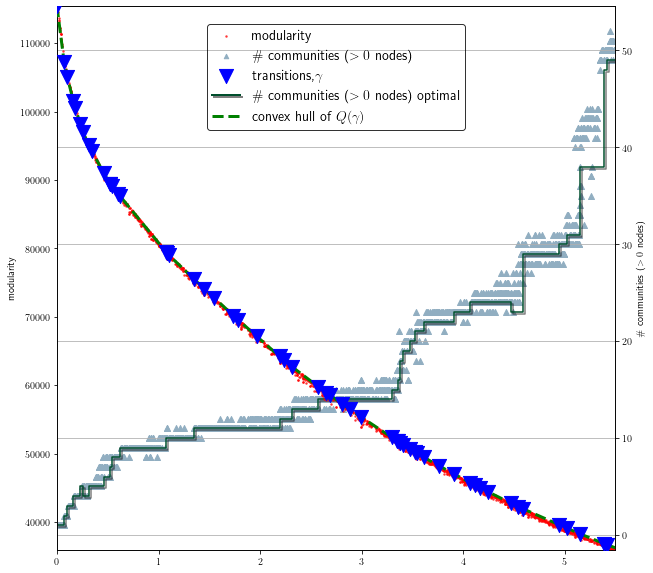

In [38]:
#save larger version of convex hull plot
from matplotlib import pyplot as plt
thirty_leiden2.plot_modularity_mapping(no_tex=False)
#plt.figure(figsize=(10, 10))
plt.savefig('thirty_gammas1-5.5_5000runs.svg')

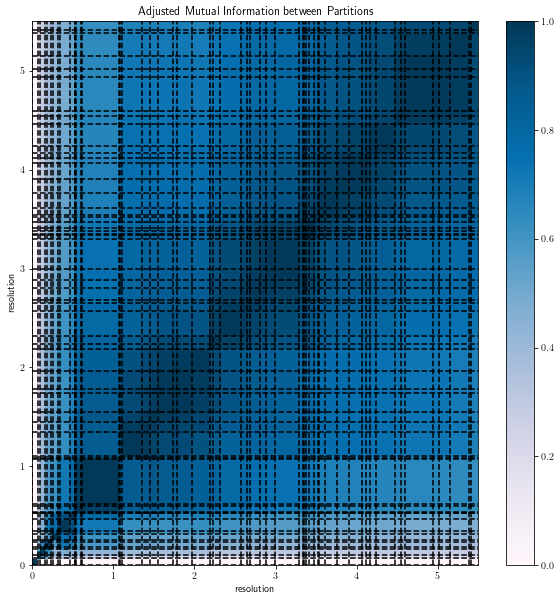

In [39]:
#save larger version of heatmap
from matplotlib import pyplot as plt
champ.plot_similarity_heatmap_single_layer_custom(thirty_leiden2,title=True)
#plt.figure(figsize=(10, 10))
plt.savefig('thirty_gammas1-5.5_5000runs heatmap.svg')

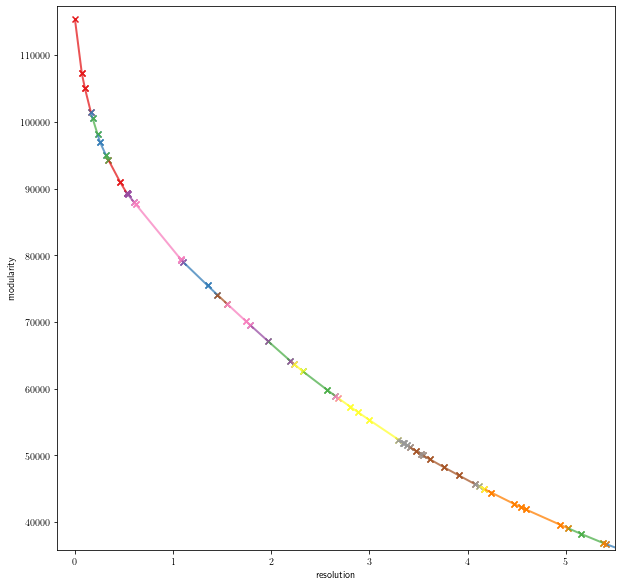

In [40]:
#save larger version of domain plot
from matplotlib import pyplot as plt
champ.plot_single_layer_modularity_domains_custom(thirty_leiden2,labels=True)
plt.savefig('thirty_gammas1-5.5_5000runs domains.svg')

In [318]:
#Contingency table comparing widest domain (9 communities) to third widest domain (14 communities) in the second run
data_crosstab = pd.crosstab(thirty_leiden2.partitions[564], 
                            thirty_leiden2.partitions[2745],
                                margins = True)
print(data_crosstab)

col_0    0    1    2    3    4   5   6   7   8   9  10  11  12  13   All
row_0                                                                   
0        0  129    0    0    0   0  81   0   5   0   0   0   0  15   230
1        0    0    0    5    0   0   0  77   0   0  69   0   0  39   190
2        0    0  125    0    0   0   0   0   4   0   0   0  59   0   188
3      134    0    0    0    0   0   0   0   0  36   0   0   0   0   170
4        0    0    0    0  106   0   0   0   0  37   0   0   0   0   143
5        0    0    0  109    0   0   0   0   0   0   0   0   0   0   109
6        0    0    0    0    0   0   0   0  66   0   0  37   0   0   103
7        0    0    0    0    0  93   0   0   0   0   0   0   0   0    93
8        0    0    0    0    0   0   0   0   0   0   0  23   0   0    23
All    134  129  125  114  106  93  81  77  75  73  69  60  59  54  1249


# Closest by Door Network Runs

In [95]:
#Import the necessary libraries and the network data for the Closest by Door Network
import igraph as ig
import leidenalg as la
import pandas as pd
from igraph import *
closest = Graph.Read_GraphML('closest_network.graphml')

In [98]:
#Print a summary of the igraph graph to make sure it worked and confirm it's weighted
summary(closest)
closest.is_weighted()

IGRAPH U-W- 1249 27267 -- 
+ attr: Degree (v), b (v), fountain (v), function_e (v), g (v), id (v), label (v), latitude (v), longitude (v), r (v), size (v), sort (v), x (v), y (v), Edge Label (e), MMNT-EdgeType (e), id (e), weight (e)


True

In [106]:
#Export the graph to csv to coordinate vertex IDs and Gephi IDs
df = closest.get_vertex_dataframe()
pd.DataFrame(df).to_csv('closest_igraphnodesID.csv')

# Closest by Door Network - First Set - 1000 Runs

C:\ProgramData\Anaconda3\lib\site-packages\champ\leiden_ext.py:167: UserWarning: Parallel Leiden Modularity function is not available of windows system.  Running in serial
  warnings.warn("Parallel Leiden Modularity function is not available of windows system.  Running in serial",


137 of 1000 partitions are unique
56 of 1000 partitions after application of CHAMP
Number of twin sets:
[]


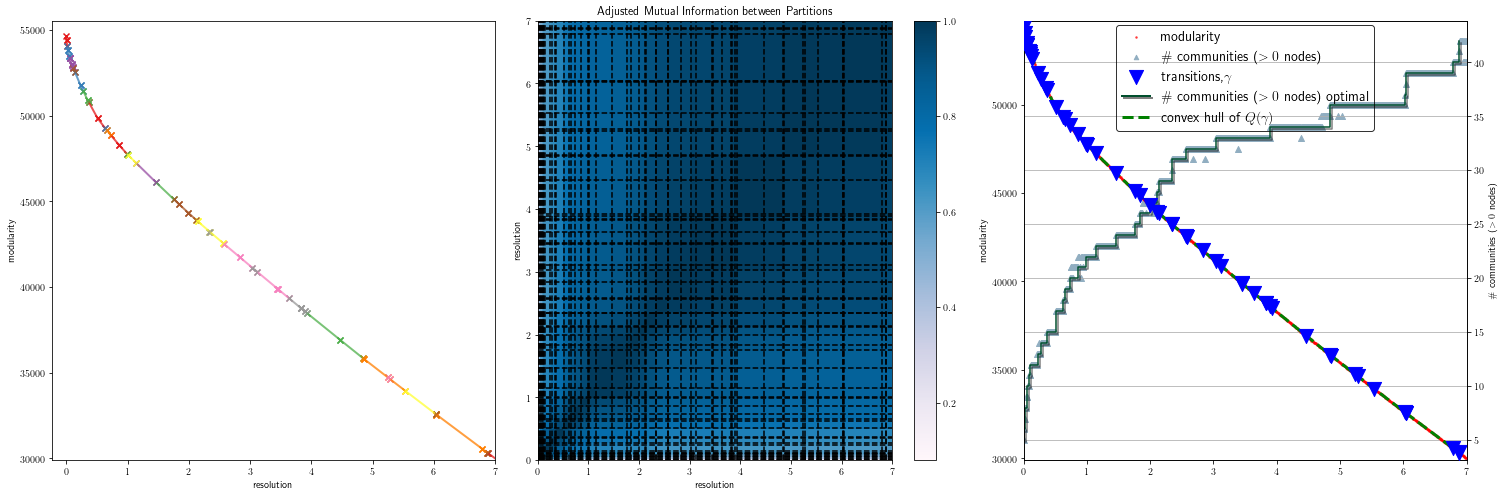

In [99]:
#Run CHAMP on closest by door weighted network with no limit to small communities. Gammas 1-7. 1000 runs, 25 iterations
closest_network1=champ.parallel_leiden(closest,weight=True,
                                  numruns=1000,start=0,fin=7,niterations=25,
                                  numprocesses=2,
                                  progress=True)

print ("%d of %d partitions are unique"%(len(closest_network1.unique_partition_indices),closest_network1.num_parts))
print ("%d of %d partitions after application of CHAMP"%(len(closest_network1.ind2doms),closest_network1.num_parts))
print ("Number of twin sets:")
print (closest_network1.twin_partitions)
#plot both of these
plt.close()
f,a=plt.subplots(1,3,figsize=(21,7))
a1,a2,a3=a
champ.plot_single_layer_modularity_domains_custom(closest_network1,ax=a1,labels=True)
champ.plot_similarity_heatmap_single_layer_custom(closest_network1,ax=a2,title=True)

#PartitionEnsemble has method to plot downsampled summary of all partitions
#with optmal transitions and number of communities overlayed.

closest_network1.plot_modularity_mapping(ax=a3,no_tex=False)
plt.tight_layout()
plt.show()

In [273]:
#This will create a dataframe that displays the partition index, number of communities, the gamma at which the 
#partition was detected (from 'resolutions') and the gamma transition for the dominant partition (from ind2doms)
#the difference between the gamma transition values indicates the width of the partition domain

pd.set_option('display.max_rows', None)
res_list = []
coms = []

for y in closest_network1.ind2doms:
    res_list.append(closest_network1.resolutions[y])
    coms.append(closest_network1.numcoms[y])
    
res_list = zip(coms, res_list)

inds=list(zip(closest_network1.ind2doms.keys(),[val[0][0] for val in closest_network1.ind2doms.values()]))
#asscending sort by last value of domain
#inds.sort(key=lambda x: x[1])
inds = [ind[0] for ind in inds]
inds = sorted(inds)

def getKey(item):
    return item[1]

res_list = sorted(res_list, key=getKey)
#res_list = sorted(res_list)
#print(inds)
x = [closest_network1.ind2doms[ind][0][0] for ind in inds]
x = sorted(x)

#print(res_list)

gamma_parts = pd.DataFrame(inds,columns=['partition #'])
#print(inds,x)
df=pd.DataFrame()
df['coms'] = res_list
df=pd.DataFrame(df['coms'].tolist(), columns=['communities', 'gamma detected'])
extracted_col = df["communities"]
gamma_parts = gamma_parts.join(extracted_col)
extracted_col2 = df["gamma detected"]
gamma_parts = gamma_parts.join(extracted_col2)
gamma_parts['gamma transition'] = x 
display(gamma_parts)

,partition #,communities,gamma detected,gamma transition
0,0,5.0,0.000000,0.000000
1,1,6.0,0.007007,0.004615
2,3,7.0,0.021021,0.017406
3,4,8.0,0.028028,0.025821
4,6,9.0,0.042042,0.051235
5,8,9.0,0.056056,0.057653
6,9,10.0,0.063063,0.059516
7,13,11.0,0.091091,0.090586
8,14,11.0,0.098098,0.095474
9,16,12.0,0.112112,0.105118


In [113]:
# This saves ALL the partitions in a CSV. Need to reference the dominant partition indices above to pull out ones of interest.
pd.DataFrame(closest_network1.partitions).to_csv('Closest by door Leiden 1000 runs gamma1-7.csv')

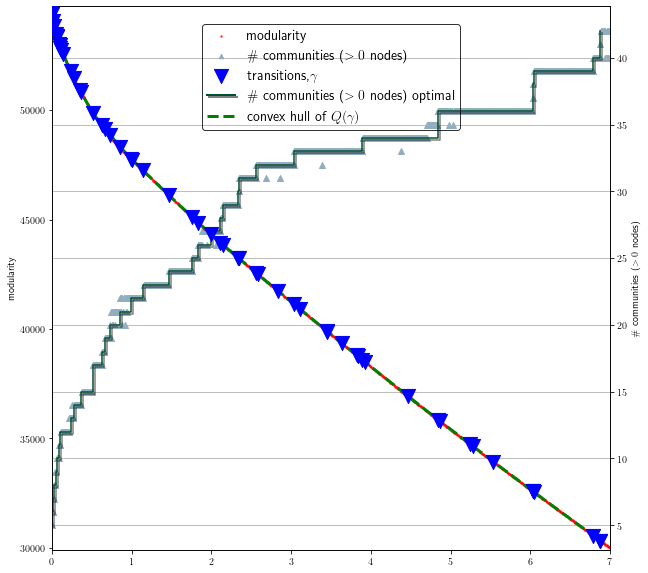

In [102]:
#save larger version of convex hull plot
from matplotlib import pyplot as plt
closest_network1.plot_modularity_mapping(no_tex=False)
#plt.figure(figsize=(10, 10))
plt.savefig('closest_by_door_0-7_1000runs 1.svg')

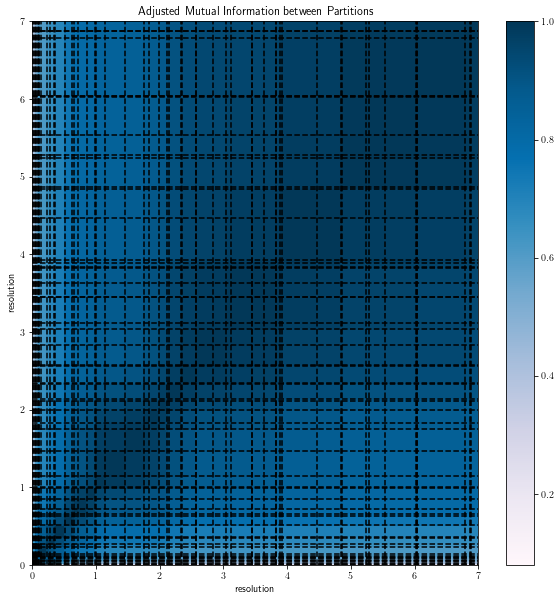

In [103]:
#save larger version of heatmap
from matplotlib import pyplot as plt
champ.plot_similarity_heatmap_single_layer_custom(closest_network1,title=True)
#plt.figure(figsize=(10, 10))
plt.savefig('closest_by_door0-7_1000runs heatmap 1.svg')

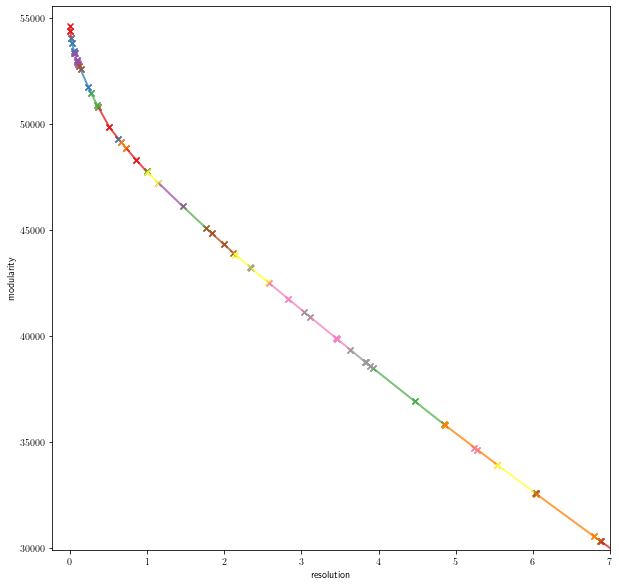

In [104]:
#save larger version of domain plot
from matplotlib import pyplot as plt
champ.plot_single_layer_modularity_domains_custom(closest_network1,labels=True)
plt.savefig('closest_by_doors0-7_1000runs domains 1.svg')

# Closest by Door Network - Second Set - 5000 runs

C:\ProgramData\Anaconda3\lib\site-packages\champ\leiden_ext.py:167: UserWarning: Parallel Leiden Modularity function is not available of windows system.  Running in serial
  warnings.warn("Parallel Leiden Modularity function is not available of windows system.  Running in serial",


200 of 5000 partitions are unique
60 of 5000 partitions after application of CHAMP
Number of twin sets:
[]


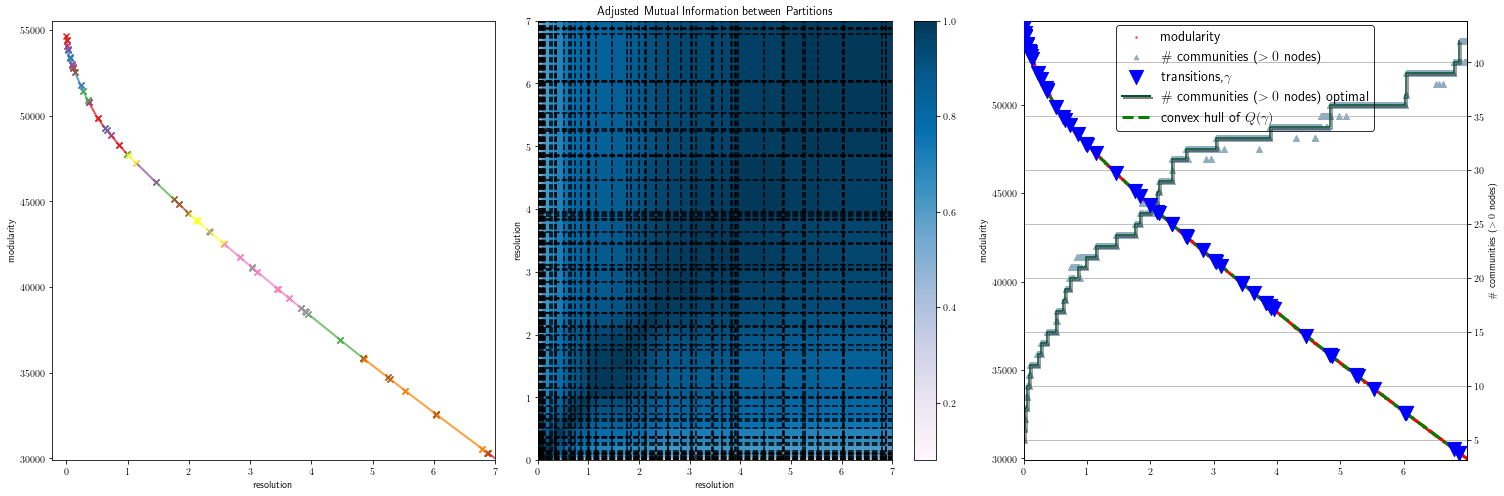

In [105]:
#run CHAMP on closest by door weighted network with no limit to small communities. Gammas 1-7. 5000 runs, 25 iterations
closest_network2=champ.parallel_leiden(closest,weight=True,
                                  numruns=5000,start=0,fin=7,niterations=25,
                                  numprocesses=2,
                                  progress=True)

print ("%d of %d partitions are unique"%(len(closest_network2.unique_partition_indices),closest_network2.num_parts))
print ("%d of %d partitions after application of CHAMP"%(len(closest_network2.ind2doms),closest_network2.num_parts))
print ("Number of twin sets:")
print (closest_network1.twin_partitions)
#plot both of these
plt.close()
f,a=plt.subplots(1,3,figsize=(21,7))
a1,a2,a3=a
champ.plot_single_layer_modularity_domains_custom(closest_network2,ax=a1,labels=True)
champ.plot_similarity_heatmap_single_layer_custom(closest_network2,ax=a2,title=True)

#PartitionEnsemble has method to plot downsampled summary of all partitions
#with optmal transitions and number of communities overlayed.

closest_network2.plot_modularity_mapping(ax=a3,no_tex=False)
plt.tight_layout()
plt.show()

In [272]:
#This will create a dataframe that displays the partition index, number of communities, the gamma at which the 
#partition was detected (from 'resolutions') and the gamma transition for the dominant partition (from ind2doms)
#the difference between the gamma transition values indicates the width of the partition domain

pd.set_option('display.max_rows', None)
res_list = []
coms = []

for y in closest_network2.ind2doms:
    res_list.append(closest_network2.resolutions[y])
    coms.append(closest_network2.numcoms[y])
    
res_list = zip(coms, res_list)

inds=list(zip(closest_network2.ind2doms.keys(),[val[0][0] for val in closest_network2.ind2doms.values()]))
#asscending sort by last value of domain
#inds.sort(key=lambda x: x[1])
inds = [ind[0] for ind in inds]
inds = sorted(inds)

def getKey(item):
    return item[1]

res_list = sorted(res_list, key=getKey)
#res_list = sorted(res_list)
#print(inds)
x = [closest_network2.ind2doms[ind][0][0] for ind in inds]
x = sorted(x)

#print(res_list)

gamma_parts = pd.DataFrame(inds,columns=['partition #'])
#print(inds,x)
df=pd.DataFrame()
df['coms'] = res_list
df=pd.DataFrame(df['coms'].tolist(), columns=['communities', 'gamma detected'])
extracted_col = df["communities"]
gamma_parts = gamma_parts.join(extracted_col)
extracted_col2 = df["gamma detected"]
gamma_parts = gamma_parts.join(extracted_col2)
gamma_parts['gamma transition'] = x 
display(gamma_parts)

,partition #,communities,gamma detected,gamma transition
0,0,5.0,0.000000,0.000000
1,4,6.0,0.005601,0.004615
2,13,7.0,0.018204,0.017406
3,18,8.0,0.025205,0.024539
4,19,8.0,0.026605,0.026052
5,26,9.0,0.036407,0.054255
6,43,10.0,0.060212,0.059516
7,65,11.0,0.091018,0.090586
8,67,11.0,0.093819,0.095474
9,76,12.0,0.106421,0.105118


In [109]:
# This saves ALL the partitions in a CSV. Need to reference the dominant partition indices above to pull out ones of interest.
pd.DataFrame(closest_network2.partitions).to_csv('Closest by door Leiden 5000 runs gamma1-7.csv')

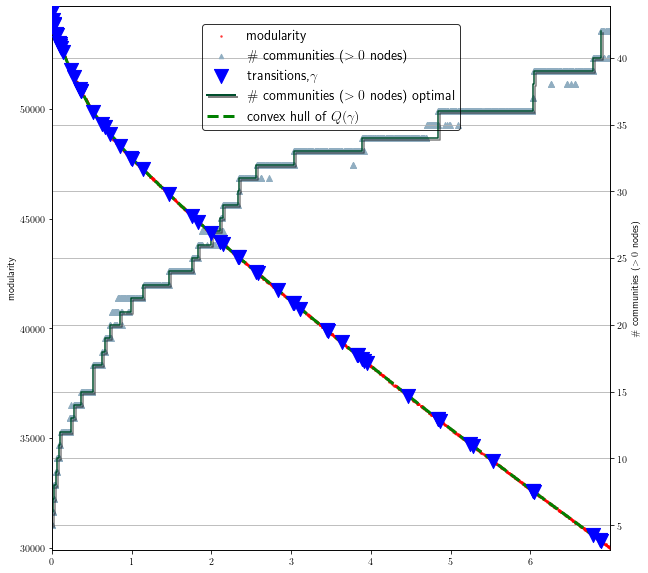

In [110]:
#save larger version of convex hull plot
from matplotlib import pyplot as plt
closest_network2.plot_modularity_mapping(no_tex=False)
#plt.figure(figsize=(10, 10))
plt.savefig('closest_by_door_0-7_5000runs 1.svg')

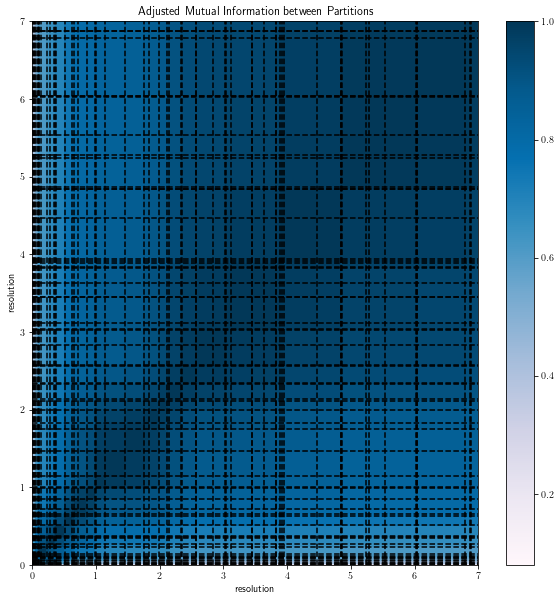

In [111]:
#save larger version of heatmap
from matplotlib import pyplot as plt
champ.plot_similarity_heatmap_single_layer_custom(closest_network2,title=True)
#plt.figure(figsize=(10, 10))
plt.savefig('closest_by_door0-7_5000runs heatmap 1.svg')

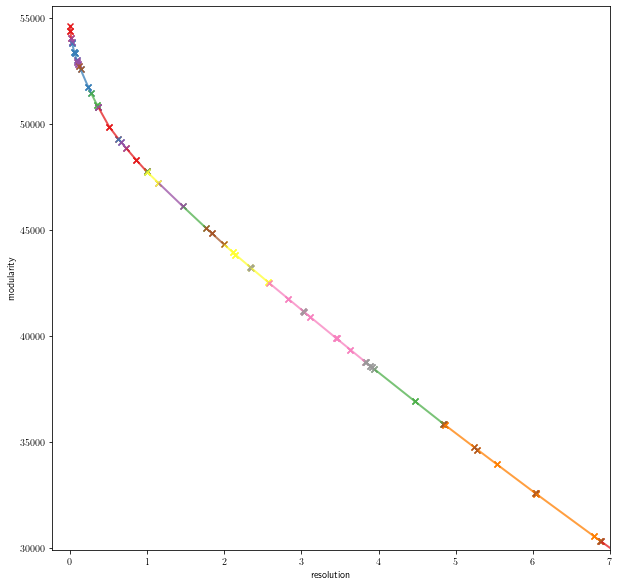

In [112]:
#save larger version of domain plot
from matplotlib import pyplot as plt
champ.plot_single_layer_modularity_domains_custom(closest_network2,labels=True)
plt.savefig('closest_by_doors0-7_5000runs domains 2.svg')

# One Minute Network Runs

In [1]:
#import the necessary libraries and network data for the One Minute Network
import igraph as ig
import leidenalg as la
import pandas as pd
from igraph import *
one_minute = Graph.Read_GraphML('one_minute_network.graphml')

In [2]:
#Print a summary of the igraph graph to make sure it worked and is weighted
summary(one_minute)
one_minute.is_weighted()

IGRAPH U-W- 1249 83411 -- 
+ attr: Cluster (v), Degree (v), Eccentricity (v), Modularity Class (v), Number of triangles (v), b (v), fountain (v), function_e (v), g (v), id (v), label (v), latitude (v), longitude (v), r (v), size (v), sort (v), x (v), y (v), Edge Label (e), MMNT-EdgeType (e), id (e), weight (e)


True

In [122]:
#Export the graph to coordinate vertex IDs and Gephi IDs
df = one_minute.get_vertex_dataframe()
pd.DataFrame(df).to_csv('one_minute_igraphnodesID.csv')

# One Minute Network - Set 1: 1000 Runs

C:\ProgramData\Anaconda3\lib\site-packages\champ\leiden_ext.py:167: UserWarning: Parallel Leiden Modularity function is not available of windows system.  Running in serial
  warnings.warn("Parallel Leiden Modularity function is not available of windows system.  Running in serial",


566 of 1000 partitions are unique
62 of 1000 partitions after application of CHAMP
Number of twin sets:
[array([780, 779], dtype=int64)]


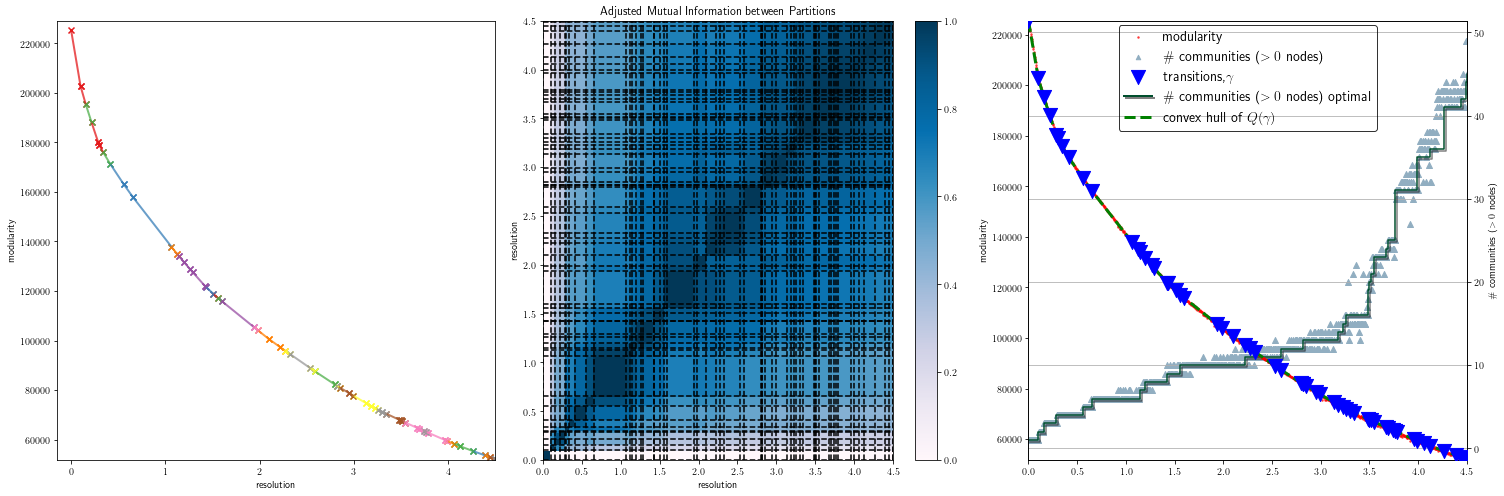

In [127]:
#run CHAMP on one minute weighted network with no limit to small communities. Gammas 1-4.5. 1000 runs, 25 iterations
one_minute_network1=champ.parallel_leiden(one_minute,weight=True,
                                  numruns=1000,start=0,fin=4.5,niterations=25,
                                  numprocesses=2,
                                  progress=True)

print ("%d of %d partitions are unique"%(len(one_minute_network1.unique_partition_indices),one_minute_network1.num_parts))
print ("%d of %d partitions after application of CHAMP"%(len(one_minute_network1.ind2doms),one_minute_network1.num_parts))
print ("Number of twin sets:")
print (one_minute_network1.twin_partitions)
#plot both of these
plt.close()
f,a=plt.subplots(1,3,figsize=(21,7))
a1,a2,a3=a
champ.plot_single_layer_modularity_domains_custom(one_minute_network1,ax=a1,labels=True)
champ.plot_similarity_heatmap_single_layer_custom(one_minute_network1,ax=a2,title=True)

#PartitionEnsemble has method to plot downsampled summary of all partitions
#with optmal transitions and number of communities overlayed.

one_minute_network1.plot_modularity_mapping(ax=a3,no_tex=False)
plt.tight_layout()
plt.show()

In [271]:
#This will create a dataframe that displays the partition index, number of communities, the gamma at which the 
#partition was detected (from 'resolutions') and the gamma transition for the dominant partition (from ind2doms)
#the difference between the gamma transition values indicates the width of the partition domain

pd.set_option('display.max_rows', None)
res_list = []
coms = []

for y in one_minute_network1.ind2doms:
    res_list.append(one_minute_network1.resolutions[y])
    coms.append(one_minute_network1.numcoms[y])
    
res_list = zip(coms, res_list)

inds=list(zip(one_minute_network1.ind2doms.keys(),[val[0][0] for val in one_minute_network1.ind2doms.values()]))
#asscending sort by last value of domain
#inds.sort(key=lambda x: x[1])
inds = [ind[0] for ind in inds]
inds = sorted(inds)

def getKey(item):
    return item[1]

res_list = sorted(res_list, key=getKey)
#res_list = sorted(res_list)
#print(inds)
x = [one_minute_network1.ind2doms[ind][0][0] for ind in inds]
x = sorted(x)

#print(res_list)

gamma_parts = pd.DataFrame(inds,columns=['partition #'])
#print(inds,x)
df=pd.DataFrame()
df['coms'] = res_list
df=pd.DataFrame(df['coms'].tolist(), columns=['communities', 'gamma detected'])
extracted_col = df["communities"]
gamma_parts = gamma_parts.join(extracted_col)
extracted_col2 = df["gamma detected"]
gamma_parts = gamma_parts.join(extracted_col2)
gamma_parts['gamma transition'] = x 
display(gamma_parts)

,partition #,communities,gamma detected,gamma transition
0,0,1.0,0.000000,0.000000
1,23,2.0,0.103604,0.100639
2,35,3.0,0.157658,0.156342
3,50,3.0,0.225225,0.216947
4,65,4.0,0.292793,0.286899
5,68,4.0,0.306306,0.298026
6,72,4.0,0.324324,0.341088
7,81,4.0,0.364865,0.412965
8,124,5.0,0.558559,0.558415
9,147,6.0,0.662162,0.653275


In [130]:
# This saves ALL the partitions in a CSV. Need to reference the dominant partition indices above to pull out ones of interest.
pd.DataFrame(one_minute_network1.partitions).to_csv('One Minute Leiden 1000 runs gamma1-7.csv')

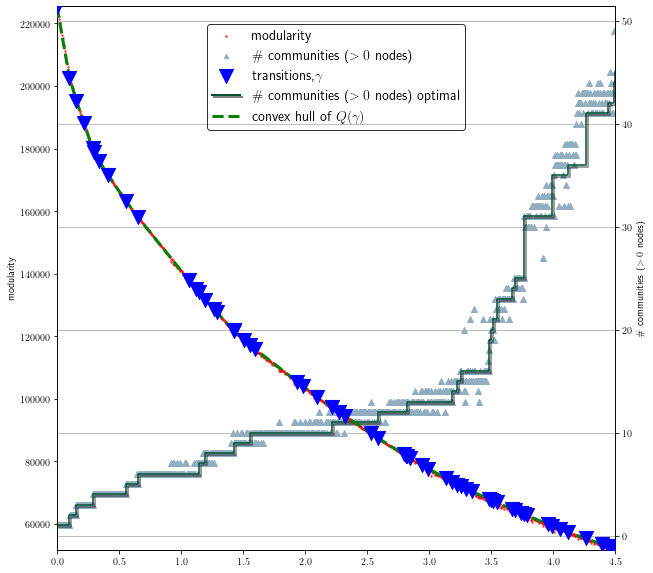

In [131]:
#save larger version of convex hull plot
from matplotlib import pyplot as plt
one_minute_network1.plot_modularity_mapping(no_tex=False)
#plt.figure(figsize=(10, 10))
plt.savefig('one-minute_0-4.5_1000runs 1.svg')

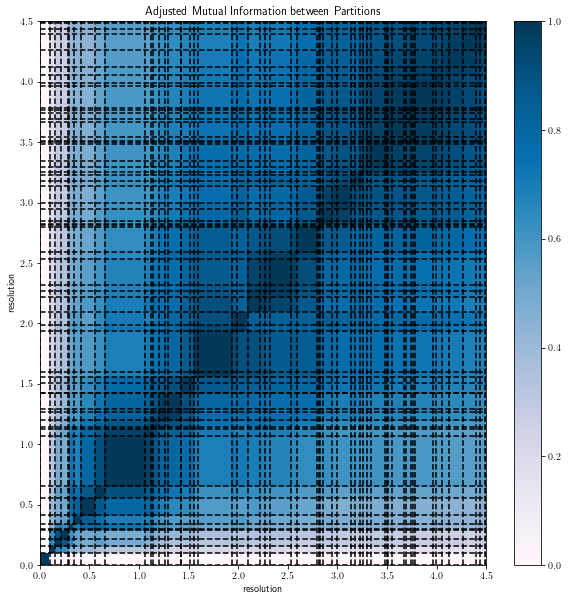

In [132]:
#save larger version of heatmap
from matplotlib import pyplot as plt
champ.plot_similarity_heatmap_single_layer_custom(one_minute_network1,title=True)
#plt.figure(figsize=(10, 10))
plt.savefig('one_minute 0-4.5_1000runs heatmap 1.svg')

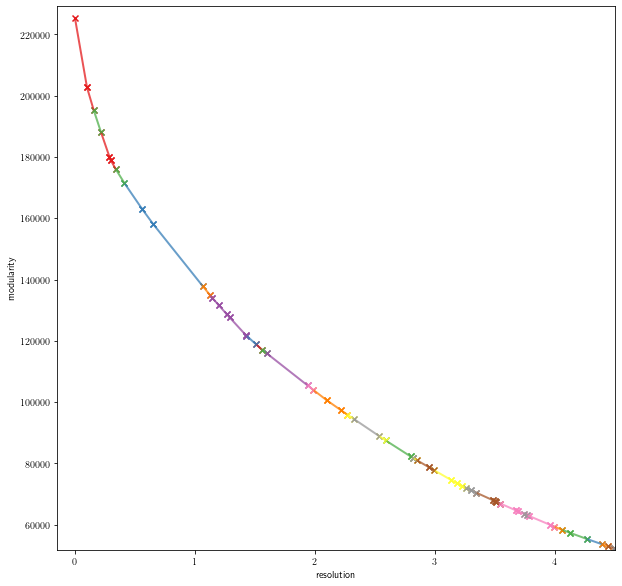

In [133]:
#save larger version of domain plot
from matplotlib import pyplot as plt
champ.plot_single_layer_modularity_domains_custom(one_minute_network1,labels=True)
plt.savefig('one_minute0-4.5_1000runs domains 1.svg')

# One Minute Network - Set 2 - 5000 Runs

C:\ProgramData\Anaconda3\lib\site-packages\champ\leiden_ext.py:167: UserWarning: Parallel Leiden Modularity function is not available of windows system.  Running in serial
  warnings.warn("Parallel Leiden Modularity function is not available of windows system.  Running in serial",


1857 of 5000 partitions are unique
70 of 5000 partitions after application of CHAMP
Number of twin sets:
[array([3916, 3911], dtype=int64), array([3883, 3878, 3873], dtype=int64), array([3938, 3951, 3937, 3946], dtype=int64), array([3933, 3929], dtype=int64), array([3918, 3913, 3907, 3908], dtype=int64), array([3867, 3857], dtype=int64), array([3882, 3886], dtype=int64), array([3932, 3950], dtype=int64), array([3899, 3904], dtype=int64), array([3923, 3920, 3927], dtype=int64), array([3891, 3890], dtype=int64), array([3856, 3870], dtype=int64), array([3868, 3869], dtype=int64)]


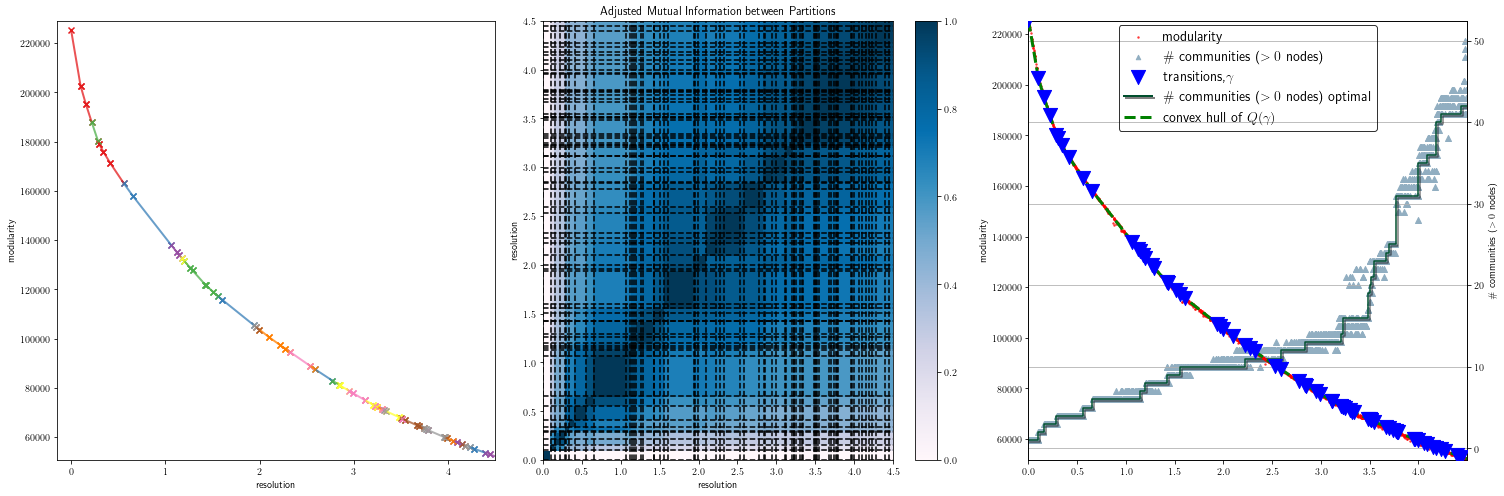

In [134]:
#run CHAMP on one minute weighted network with no limit to small communities. Gammas 1-4.5. 5000 runs, 25 iterations
one_minute_network2=champ.parallel_leiden(one_minute,weight=True,
                                  numruns=5000,start=0,fin=4.5,niterations=25,
                                  numprocesses=2,
                                  progress=True)

print ("%d of %d partitions are unique"%(len(one_minute_network2.unique_partition_indices),one_minute_network2.num_parts))
print ("%d of %d partitions after application of CHAMP"%(len(one_minute_network2.ind2doms),one_minute_network2.num_parts))
print ("Number of twin sets:")
print (one_minute_network2.twin_partitions)
#plot both of these
plt.close()
f,a=plt.subplots(1,3,figsize=(21,7))
a1,a2,a3=a
champ.plot_single_layer_modularity_domains_custom(one_minute_network2,ax=a1,labels=True)
champ.plot_similarity_heatmap_single_layer_custom(one_minute_network2,ax=a2,title=True)

#PartitionEnsemble has method to plot downsampled summary of all partitions
#with optmal transitions and number of communities overlayed.

one_minute_network2.plot_modularity_mapping(ax=a3,no_tex=False)
plt.tight_layout()
plt.show()

In [267]:
#This will create a dataframe that displays the partition index, number of communities, the gamma at which the 
#partition was detected (from 'resolutions') and the gamma transition for the dominant partition (from ind2doms)
#the difference between the gamma transition values indicates the width of the partition domain

pd.set_option('display.max_rows', None)
res_list = []
coms = []

for y in one_minute_network2.ind2doms:
    res_list.append(one_minute_network2.resolutions[y])
    coms.append(one_minute_network2.numcoms[y])
    
res_list = zip(coms, res_list)

inds=list(zip(one_minute_network2.ind2doms.keys(),[val[0][0] for val in one_minute_network2.ind2doms.values()]))
#asscending sort by last value of domain
#inds.sort(key=lambda x: x[1])
inds = [ind[0] for ind in inds]
inds = sorted(inds)

def getKey(item):
    return item[1]

res_list = sorted(res_list, key=getKey)
#res_list = sorted(res_list)
#print(inds)
x = [one_minute_network2.ind2doms[ind][0][0] for ind in inds]
x = sorted(x)

#print(res_list)

gamma_parts = pd.DataFrame(inds,columns=['partition #'])
#print(inds,x)
df['coms'] = res_list
df=pd.DataFrame(df['coms'].tolist(), columns=['communities', 'gamma detected'])
extracted_col = df["communities"]
gamma_parts = gamma_parts.join(extracted_col)
extracted_col2 = df["gamma detected"]
gamma_parts = gamma_parts.join(extracted_col2)
gamma_parts['gamma transition'] = x 
display(gamma_parts)

,partition #,communities,gamma detected,gamma transition
0,0,1.0,0.000000,0.000000
1,112,2.0,0.100820,0.100639
2,176,3.0,0.158432,0.156342
3,200,3.0,0.180036,0.216947
4,319,4.0,0.287157,0.286899
5,327,4.0,0.294359,0.298026
6,349,4.0,0.314163,0.341088
7,400,4.0,0.360072,0.412965
8,622,5.0,0.559912,0.558415
9,726,6.0,0.653531,0.653275


In [136]:
# This saves ALL the partitions in a CSV. Need to reference the dominant partition indices above to pull out ones of interest.
pd.DataFrame(one_minute_network2.partitions).to_csv('One Minute Leiden 5000 runs gamma1-4.5.csv')

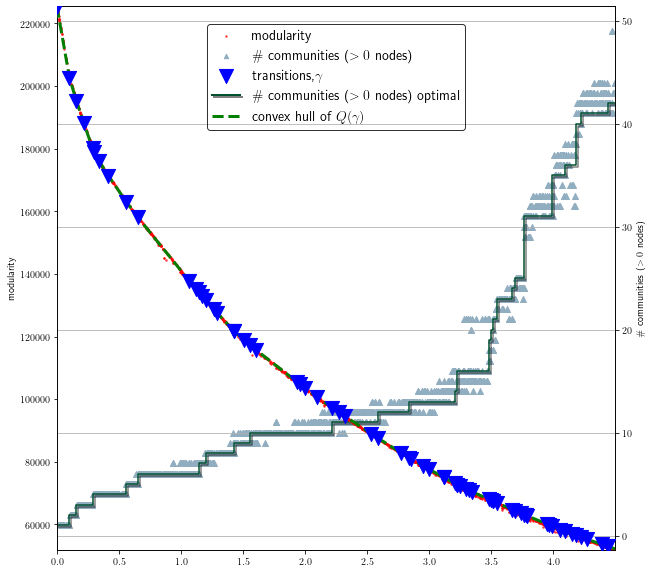

In [137]:
#Save larger version of convex hull plot
from matplotlib import pyplot as plt
one_minute_network2.plot_modularity_mapping(no_tex=False)
#plt.figure(figsize=(10, 10))
plt.savefig('one-minute_0-4.5_5000runs 2.svg')

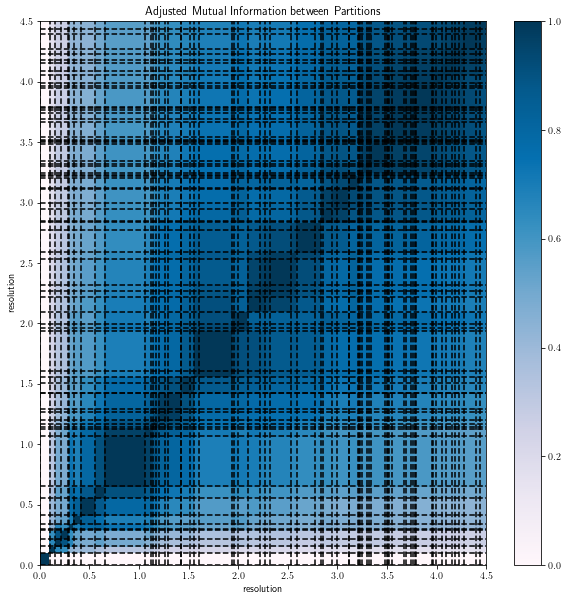

In [138]:
#save larger version of heatmap
from matplotlib import pyplot as plt
champ.plot_similarity_heatmap_single_layer_custom(one_minute_network2,title=True)
#plt.figure(figsize=(10, 10))
plt.savefig('one_minute 0-4.5_5000runs heatmap 2.svg')

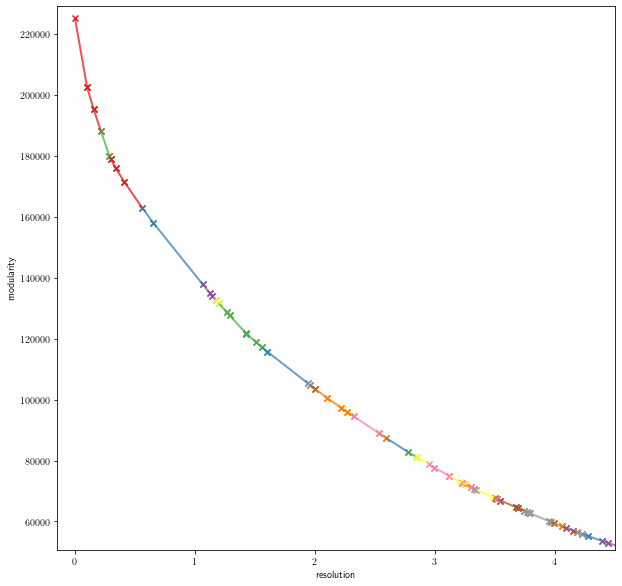

In [139]:
#save larger version of domain plot
from matplotlib import pyplot as plt
champ.plot_single_layer_modularity_domains_custom(one_minute_network2,labels=True)
plt.savefig('one_minute0-4.5_5000runs domains 2.svg')

In [319]:
#Contingency table comparing partitions 726 (widest domain) and 1796 (second widest domain) in the second set
data_crosstab = pd.crosstab(one_minute_network2.partitions[726], 
                            one_minute_network2.partitions[1796],
                                margins = True)
print(data_crosstab)

col_0    0    1    2    3    4    5    6   7   8   9   All
row_0                                                     
0        0    0  144  144    0    0   17   0   0   3   308
1        0   43    0    0    0  119    0   0  90   0   252
2      196    0    0    0    0   10    8   0   1  31   246
3        0    0    0    0  130    0   88   0   0   0   218
4        0  126    0    0    0    0    0   0   0   0   126
5        0    0    0    0    0    0    0  99   0   0    99
All    196  169  144  144  130  129  113  99  91  34  1249
